In [1]:
import scipy.io as sio
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
path= './features/'
patient=sio.loadmat(path + 'S100B.mat') 

In [3]:
#df=pd.DataFrame.from_dict(patient)
electrodos8 = ['Fp1','F3','C3','Fz','Cz','Fp2','F4','C4']
bandas_de_potencia = ['Theta2+Alpha1', 'Theta', 'Alpha', 'Beta_Global', 'Beta_Alta', 'Beta_Baja','Gamma']
df = pd.DataFrame(patient['BandPower'], index=electrodos8, columns=bandas_de_potencia)
df['BandPowerRatio'] = patient['BandPowerRatio']

In [4]:
#ALL FILES, including all experiments
import glob
list_of_filenames=glob.glob('./features/S*.mat')
list_df=[]

for i in range(1,len(list_of_filenames)):
    patient_i=sio.loadmat(list_of_filenames[i])
    
    #patient_i = sio.loadmat(path + i)
    df = pd.DataFrame(patient_i['BandPower'], index=electrodos8, columns=bandas_de_potencia)
    df['BandPowerRatio'] = patient_i['BandPowerRatio']
    list_df.append(df)
    
allpatients_df = pd.concat(list_df)

In [9]:

#dataframe all patients all experiments
#The index are the points of measure ['Fp1','F3','C3','Fz','Cz','Fp2','F4','C4']
#dataframes 8*8 (points of measure * bands + bandratio) are concatenated one after the other keeping index and columns
#therefore: 
#1. Accesing a given point of measure for all patients is done this way:
# allpatients_df.ix['Fz']
#2. Accesiong a specific band in a given point of measure for all patients
# allpatients_df.ix['Fz']['Theta']
#3. Accesing a given band for each patient and each point
#allpatients_df['Theta'] the shape es 2688->336*8


allpatients_df = allpatients_df.fillna(0)#
allpatients_reshaped = allpatients_df.values.reshape(allpatients_df.shape[0]/8,64)


In [11]:
#ALL FILES experiment A
import glob
list_of_filenames=glob.glob('./features/S*A.mat')
listA=[]

for i in range(1,len(list_of_filenames)):
    patient_i=sio.loadmat(list_of_filenames[i])
    df = pd.DataFrame(patient_i['BandPower'], index=electrodos8, columns=bandas_de_potencia)
    df['BandPowerRatio'] = patient_i['BandPowerRatio']
    listA.append(df)
    
all_A_df = pd.concat(listA)

In [12]:
#ALL FILES experiment B
import glob
list_of_filenames=glob.glob('./features/S*B.mat')
listB=[]

for i in range(1,len(list_of_filenames)):
    patient_i=sio.loadmat(list_of_filenames[i])
    df = pd.DataFrame(patient_i['BandPower'], index=electrodos8, columns=bandas_de_potencia)
    df['BandPowerRatio'] = patient_i['BandPowerRatio']
    listB.append(df)
    
all_B_df = pd.concat(listB)

In [14]:
#ALL FILES experiment B
import glob
list_of_filenames=glob.glob('./features/S*C.mat')
listC=[]

for i in range(1,len(list_of_filenames)):
    patient_i=sio.loadmat(list_of_filenames[i])
    df = pd.DataFrame(patient_i['BandPower'], index=electrodos8, columns=bandas_de_potencia)
    df['BandPowerRatio'] = patient_i['BandPowerRatio']

    listC.append(df)
    
all_C_df = pd.concat(listC)

In [15]:
# reshaped matrixes to be introduced in the kmeans pca etc. Not for plotting

all_B_df.fillna(0)
all_C_df.fillna(0)

all_A_reshaped = all_A_df.values.reshape(all_A_df.shape[0]/8,64)
all_B_reshaped = all_B_df.values.reshape(all_B_df.shape[0]/8,64)
all_C_reshaped = all_C_df.values.reshape(all_C_df.shape[0]/8,64)



In [16]:
all_C_df.ix[1:15]

,Theta2+Alpha1,Theta,Alpha,Beta_Global,Beta_Alta,Beta_Baja,Gamma,BandPowerRatio
F3,3.546767,3.580727,2.480874,0.436710,0.218574,0.446130,0.187339,18.019043
C3,3.955289,3.083280,3.392700,0.275192,0.126044,0.300213,0.108210,33.362975
Fz,3.783471,3.881996,2.585048,0.359671,0.156199,0.379585,0.134535,26.341959
Cz,3.956513,2.823306,3.798796,0.229504,0.092600,0.259336,0.078780,45.029836
Fp2,2.944201,2.761306,2.494215,0.512906,0.340862,0.559017,0.330614,10.462008
F4,3.544139,2.569195,3.462263,0.389193,0.181704,0.422735,0.157386,23.320927
C4,3.778630,2.498654,3.778925,0.300594,0.135841,0.319222,0.115996,30.065443
Fp1,2.093985,3.056998,1.201493,0.970321,0.547896,0.858342,0.465480,4.280973
F3,2.371874,4.193291,1.303322,0.607247,0.338007,0.643043,0.291645,8.215446
C3,2.210198,3.763505,1.430730,0.675083,0.344811,0.755737,0.298978,6.651834


In [192]:
## Example to check how the data looks like

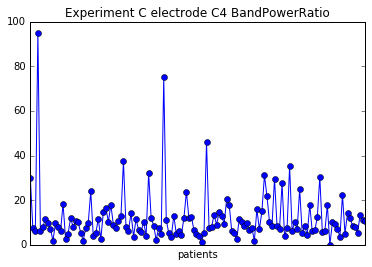

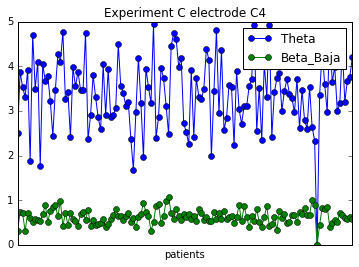

In [17]:
%matplotlib inline 
import matplotlib.pyplot as plt

row=all_C_df.ix['C4']['BandPowerRatio']

row.plot(kind='line',style='-o', xticks=[])
plt.title("Experiment C electrode C4 BandPowerRatio")
plt.xlabel('patients')
plt.figure()

row=all_C_df.ix['C4']['Theta']

row.plot(kind='line',style='-o', xticks=[],label='Theta')

row=all_C_df.ix['C4']['Beta_Baja']
row.plot(kind='line',style='-o', xticks=[],label='Beta_Baja')
plt.title("Experiment C electrode C4")
plt.legend()
plt.xlabel('patients')
plt.figure()


# 1. COMPARISON BETWEEN EXPERMENTS: Average values for the 3 experiments

In [169]:
mean_A_bandas=all_A_df.mean(axis=0)
mean_B_bandas=all_B_df.mean(axis=0)
mean_C_bandas=all_C_df.mean(axis=0)

In [170]:
mean_C_bandas

Theta2+Alpha1     2.450881
Theta             3.473236
Alpha             1.632034
Beta_Global       0.619662
Beta_Alta         0.367546
Beta_Baja         0.655731
Gamma             0.327316
BandPowerRatio    9.958379
dtype: float64

In [73]:
electrodos8 = ['Fp1','F3','C3','Fz','Cz','Fp2','F4','C4']

In [171]:
list_A_electrodos=[]
list_B_electrodos=[]
list_C_electrodos=[]
dfa=pd.DataFrame(columns=electrodos8,index=bandas_de_potencia)
dfb=pd.DataFrame(columns=electrodos8,index=bandas_de_potencia)
dfc=pd.DataFrame(columns=electrodos8,index=bandas_de_potencia)
for i in electrodos8:
    dfa[i]=pd.DataFrame(all_A_df.ix[i].mean())
    dfb[i]=pd.DataFrame(all_B_df.ix[i].mean())
    dfc[i]=pd.DataFrame(all_C_df.ix[i].mean())
    print i
    list_A_electrodos.append(dfa)
    list_B_electrodos.append(dfb)
    list_C_electrodos.append(dfc)
    
ave_A_electrodos = pd.concat(list_A_electrodos)  
ave_B_electrodos = pd.concat(list_B_electrodos) 
ave_C_electrodos = pd.concat(list_C_electrodos) 


Fp1
F3
C3
Fz
Cz
Fp2
F4
C4


In [172]:
mean_A_electrodos=ave_A_electrodos.mean()
mean_B_electrodos=ave_B_electrodos.mean()
mean_C_electrodos=ave_C_electrodos.mean()

In [174]:
mean_A_electrodos

Fp1    1.307925
F3     1.362314
C3     1.394996
Fz     1.402220
Cz     1.440160
Fp2    1.280158
F4     1.356052
C4     1.382713
dtype: float64

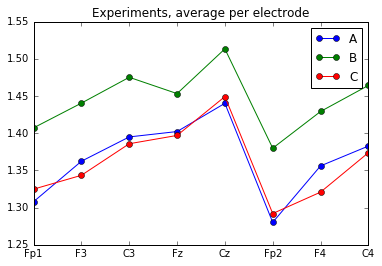

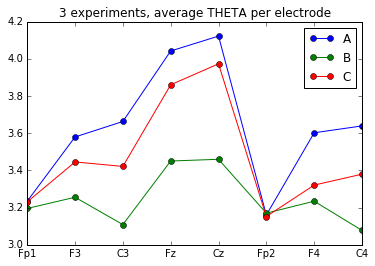

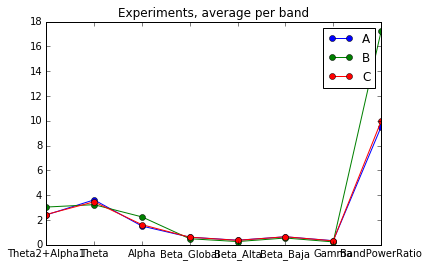

In [346]:
%matplotlib inline 
import matplotlib.pyplot as plt

mean_A_electrodos.plot(kind='line',style='-o',label='A')
mean_B_electrodos.plot(kind='line',style='-o',label='B')
mean_C_electrodos.plot(kind='line',style='-o',label='C')
plt.legend()
plt.title("Experiments, average per electrode")
plt.figure()

ave_A_electrodos.ix['Theta'].mean().plot(kind='line',style='-o',label='A')
ave_B_electrodos.ix['Theta'].mean().plot(kind='line',style='-o',label='B')
ave_C_electrodos.ix['Theta'].mean().plot(kind='line',style='-o',label='C')
plt.legend()
plt.title("Experiments, average THETA per electrode")
plt.figure()


mean_A_bandas.plot(kind='line',style='-o',label='A')
mean_B_bandas.plot(kind='line',style='-o',label='B')
mean_C_bandas.plot(kind='line',style='-o',label='C')
plt.title("Experiments, average per band")
plt.legend()
plt.figure()

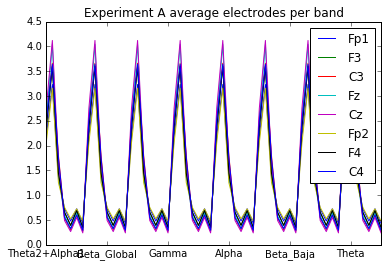

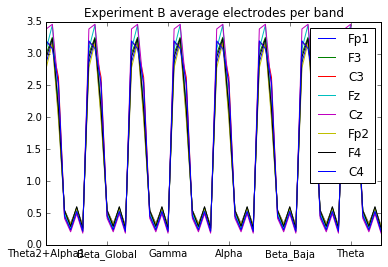

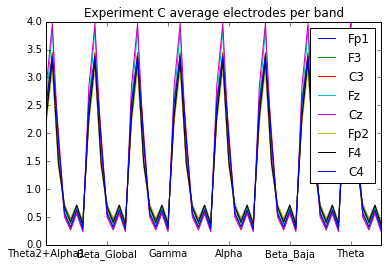

In [345]:
# averages per band
ave_A_electrodos.plot(title='Experiment A average electrodes per band')
plt.figure()


ave_B_electrodos.plot(title='Experiment B average electrodes per band')
plt.figure()

ave_C_electrodos.plot(title='Experiment C average electrodes per band')
plt.figure()

# 2. COMPARISON BETWEEN EXPERIMENTS: All values for 3 experiments

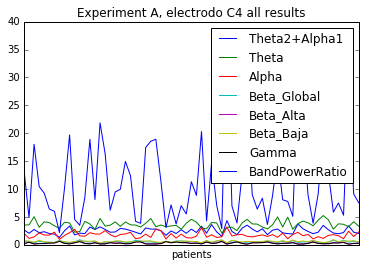

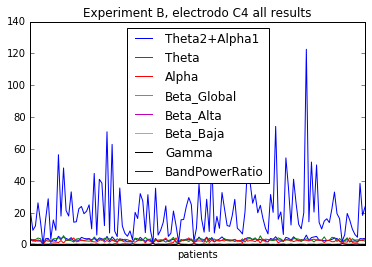

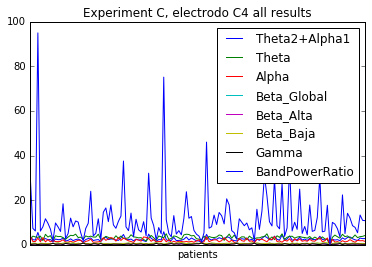

In [336]:
matrix_C4_allA_theta = all_A_df.ix['C4']
matrix_C4_allB_theta = all_B_df.ix['C4']
matrix_C4_allC_theta = all_C_df.ix['C4']
matrix_C4_allA_theta.plot(xticks=[])
plt.title("Experiment A, electrodo C4 all results")
plt.xlabel('patients')
plt.figure()
matrix_C4_allB_theta.plot(xticks=[])
plt.title("Experiment B, electrodo C4 all results")
plt.xlabel('patients')
plt.figure()
matrix_C4_allC_theta.plot(xticks=[])
plt.title("Experiment C, electrodo C4 all results")
plt.xlabel('patients')
plt.figure()

### 3. ONE PARTICULAR EXPERIMENT

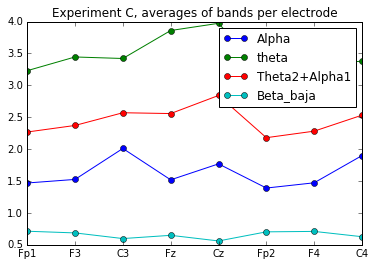

In [347]:
#1. Averages per electrodes

ave_C_electrodos.ix['Alpha'].mean().plot(kind='line',style='-o',label='Alpha')
ave_C_electrodos.ix['Theta'].mean().plot(kind='line',style='-o',label='theta')
ave_C_electrodos.ix['Theta2+Alpha1'].mean().plot(kind='line',style='-o',label='Theta2+Alpha1')
ave_C_electrodos.ix['Beta_Baja'].mean().plot(kind='line',style='-o',label='Beta_baja')
plt.legend()
plt.title("Experiment C, averages of bands per electrode")
plt.figure()

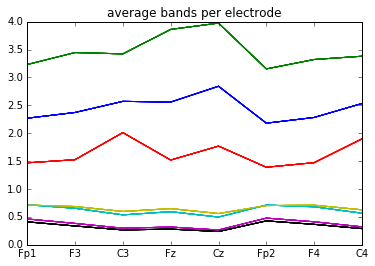

In [540]:
# All the bands
ave_C_electrodos.T.plot(legend=False,title='average bands per electrode')
plt.figure()

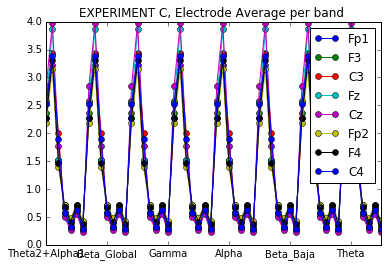

In [541]:
#2. Averages per band

ave_C_electrodos.plot(kind='line',style='-o', title='EXPERIMENT C, Electrode Average per band ')
plt.figure()

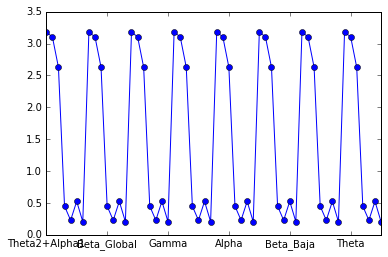

In [542]:
ave_B_electrodos['C3'].plot(kind='line',style='-o')
plt.figure()

('C4 Theta min-> ', 0.0)
('C4 Theta mean-> ', 3.3796991784080306)
('C4 Theta max-> ', 4.9457154851266782)
('C4 Theta std-> ', 0.7884983004305337)


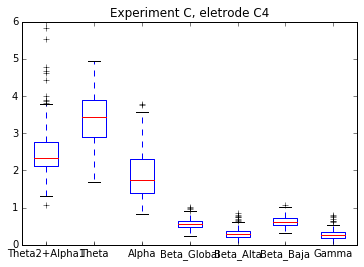

In [544]:
#3. Boxplots with min,mean,max for all bandas . Goal detecting the
#the most discriminative bands.  Most discriminative will be the bands with biggest std.                
prueba=all_C_df.ix['C4']
prueba.head()

print("C4 Theta min-> ",prueba['Theta'].min())
print("C4 Theta mean-> ",prueba['Theta'].mean())
print("C4 Theta max-> ",prueba['Theta'].max())
print("C4 Theta std-> ",prueba['Theta'].std())

#Use this info to reflect this in a graphic using boxplots for every band!!!
#Warning: no finish!!!
prueba = prueba.drop('BandPowerRatio',axis=1)
prueba.plot.box(title='Experiment C, eletrode C4')

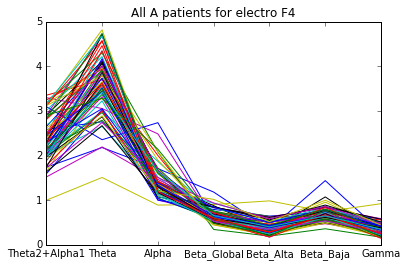

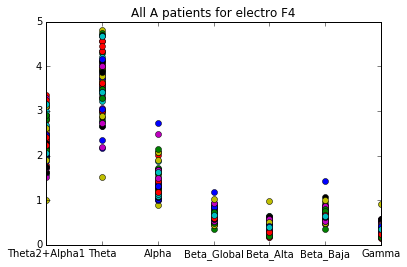

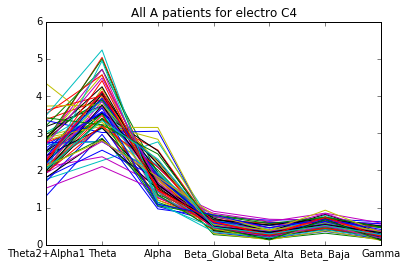

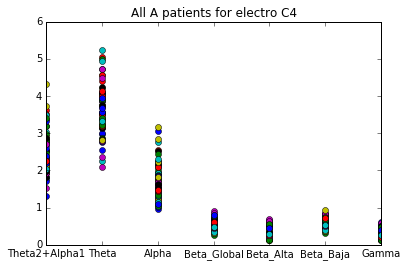

In [545]:
#4. graphics of all bands for all patients in a given electrode
pacientes_A_F4 = all_A_df.ix['F4']
pacientes_A_F4 = pacientes_A_F4.drop('BandPowerRatio', axis=1)
pacientes_A_F4.T.plot(legend=False, title='All A patients for electro F4')
pacientes_A_F4.T.plot(kind='line', legend=False, style='o', title='All A patients for electro F4')

# sorting values by Theta may be useful to guide the eye in a 3D pic..not yet done. TRY!!
#result = pacientes_A_F4.sort_values(['Theta'], ascending=True)
#result.T.plot(legend=False, title='All A Patients for electro F4 Sorted by Theta()')
#plt.figure()

pacientes_A_C4 = all_A_df.ix['C4']
pacientes_A_C4 = pacientes_A_C4.drop('BandPowerRatio', axis=1)
pacientes_A_C4.T.plot(legend=False, title='All A patients for electro C4')
pacientes_A_C4.T.plot(kind='line', legend=False, style='o', title='All A patients for electro C4')
plt.figure()


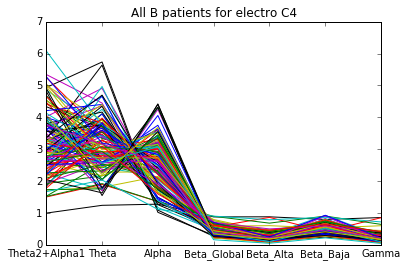

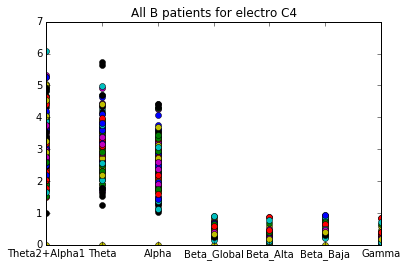

In [198]:
# graphics of all bands for all patients in a given point
pacientes_B_C4 = all_B_df.ix['C4']
pacientes_B_C4 = pacientes_B_C4.drop('BandPowerRatio', axis=1)
pacientes_B_C4.T.plot(legend=False, title='All B patients for electro C4')
pacientes_B_C4.T.plot(kind='line', legend=False, style='o', title='All B patients for electro C4')
plt.figure()


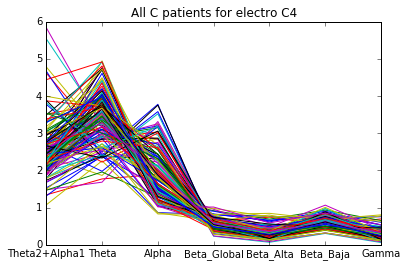

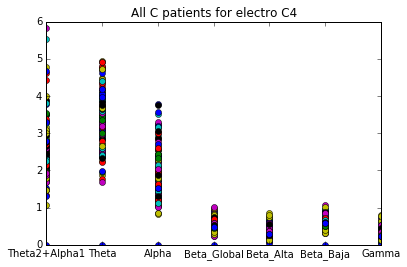

In [197]:
# graphics of all bands for all patients C in a given point

pacientes_C_C4 = all_C_df.ix['C4']
pacientes_C_C4 = pacientes_C_C4.drop('BandPowerRatio', axis=1)
pacientes_C_C4.T.plot(legend=False, title='All C patients for electro C4')
pacientes_C_C4.T.plot(kind='line', legend=False, style='o', title='All C patients for electro C4')
plt.figure()

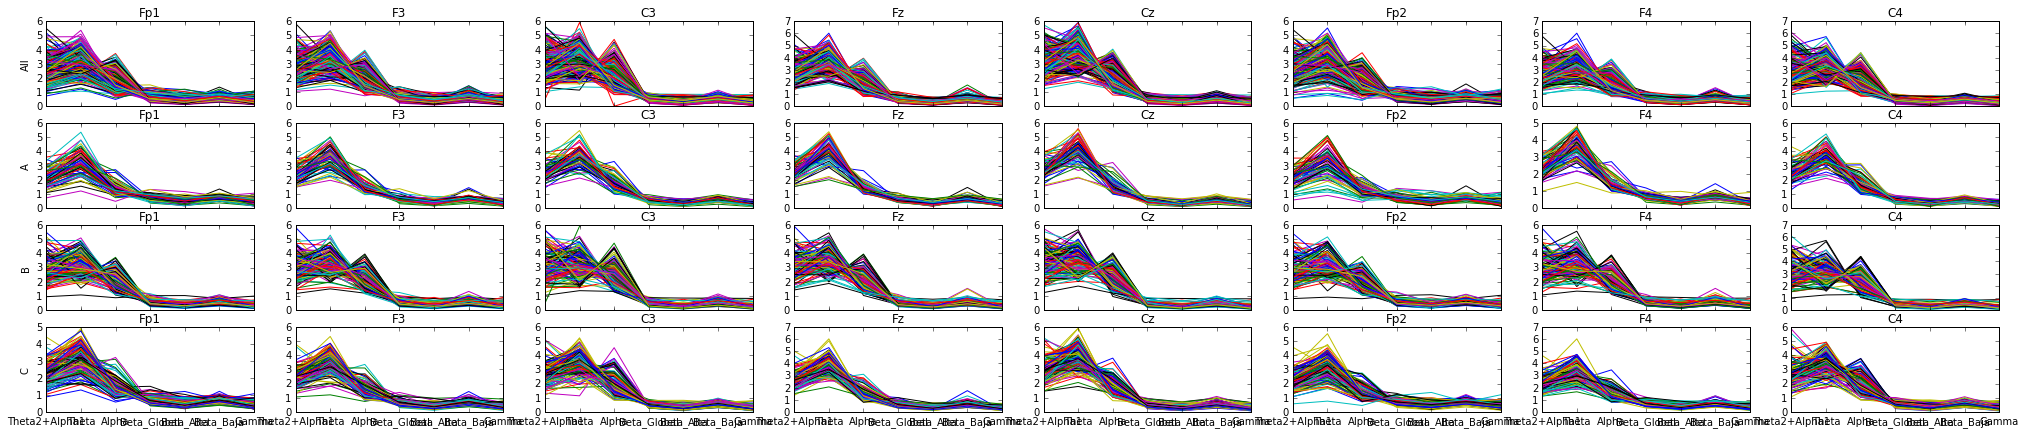

In [352]:
#Mosaic with all charts 

group_names = ['All','A', 'B', 'C']
groups = [allpatients_df,all_A_df,all_B_df,all_C_df]
index_names=0
fig, axs = plt.subplots(nrows=len(groups),ncols=len(electrodos8),figsize=(35,7))
#nrows=2, ncols=3, figsize=(6, 6)
for group in range(len(groups)):
    for electro in range(len(electrodos8)):
        #ax=axs[group,electro]
        patients = groups[group].ix[electrodos8[electro]]
        patients = patients.drop('BandPowerRatio', axis=1)
        patients.T.plot(ax=axs[group,electro],legend=False,sharex=True,title=electrodos8[electro])        
    axs[group,0].set_ylabel(group_names[group])  
    

# PCA Analysis

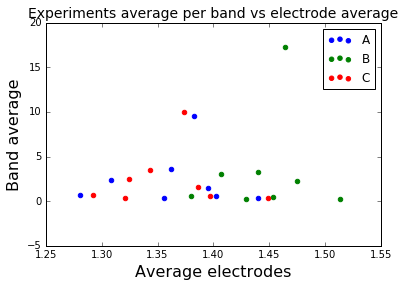

In [367]:
plt.scatter(mean_A_electrodos,mean_A_bandas,color='b',label='A')
plt.scatter(mean_B_electrodos,mean_B_bandas,color='g',label='B')
plt.scatter(mean_C_electrodos,mean_C_bandas,color='r',label='C')
plt.xlabel('Average electrodes',size=16)
plt.ylabel('Band average',size=16)
plt.legend()
plt.title("Experiments average per band vs electrode average",size=14)

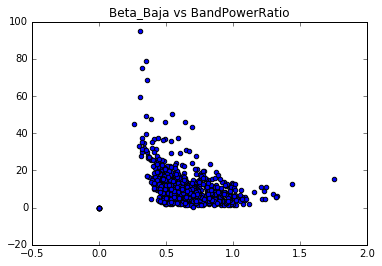

In [377]:
plt.scatter(all_C_df['Beta_Baja'],all_C_df['BandPowerRatio'])
plt.title('Beta_Baja vs BandPowerRatio')

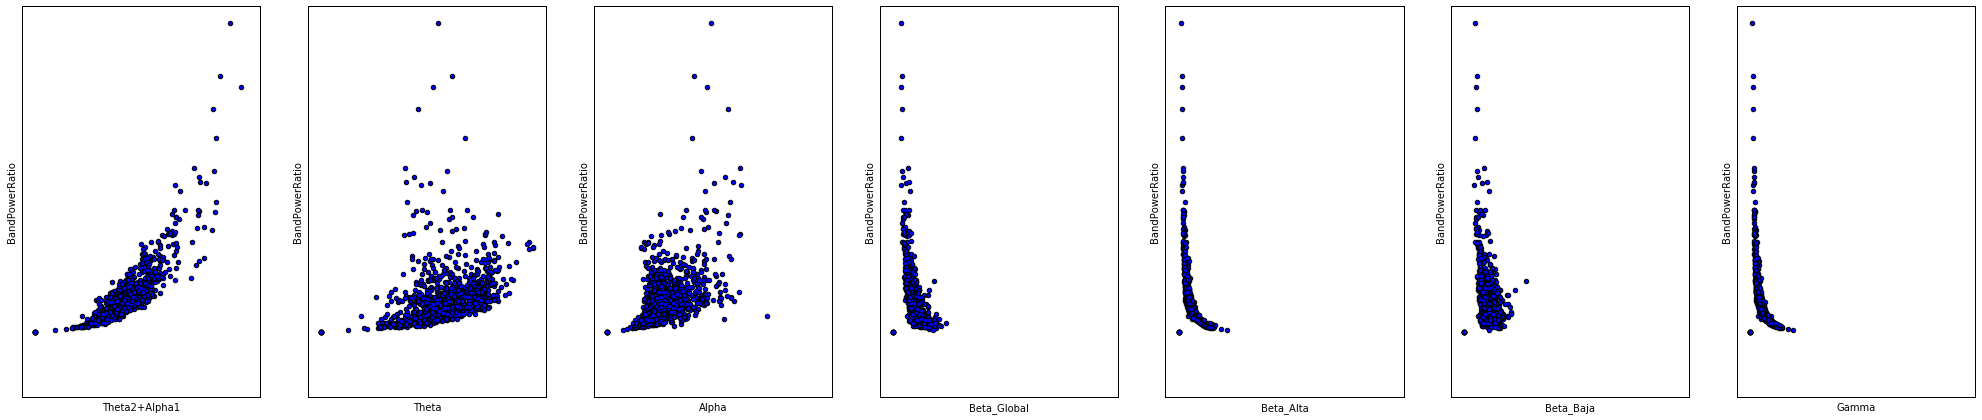

In [434]:
## THIS IS AN ATTEMPT TO FIND BANDPOWER RATIO'S ORIGIN (dependency with other bands could be obtained)
fig, axs = plt.subplots(nrows=1,ncols=len(bandas_de_potencia),figsize=(35,7),sharex=True)
#nrows=2, ncols=3, figsize=(6, 6)
for i in range(len(bandas_de_potencia)):
     
        axs[i].scatter(all_C_df[bandas_de_potencia[i]],all_C_df['BandPowerRatio']) 
        axs[i].set_xlabel(bandas_de_potencia[i])
        axs[i].set_ylabel('BandPowerRatio')
        axs[i].autoscale(enable=True,axis='x')
        axs[i].set_xticks([])
        axs[i].set_yticks([])
        
       

In [ ]:
## PCA decomposition. Result: Not all 64 variables are important! 15 would be enough!!!!

In [487]:
from sklearn.decomposition import PCA
pca = PCA(n_components=64)
pca.fit(all_A_reshaped)
PCA(copy=True, n_components=64, whiten=False)
VR_A=pca.explained_variance_ratio_.cumsum()
print(pca.explained_variance_ratio_.cumsum()) 


[ 0.77775485  0.85074584  0.8964656   0.9373646   0.9605321   0.97627896
  0.9842256   0.99028724  0.99386986  0.9955562   0.99643177  0.99722643
  0.99795429  0.99838229  0.99877557  0.99901785  0.99924253  0.99942069
  0.99952195  0.99961074  0.99967548  0.99973556  0.99978107  0.99981372
  0.99984196  0.99986583  0.99988728  0.99990609  0.99992203  0.99993703
  0.99994829  0.99995783  0.99996571  0.99997256  0.9999786   0.99998314
  0.99998707  0.99999022  0.99999258  0.99999436  0.99999582  0.99999711
  0.99999774  0.99999823  0.99999866  0.999999    0.99999923  0.99999941
  0.99999955  0.99999966  0.99999975  0.99999982  0.99999987  0.99999991
  0.99999994  0.99999996  0.99999997  0.99999999  0.99999999  1.          1.
  1.          1.          1.        ]


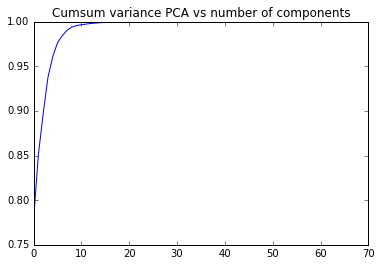

In [488]:
plt.plot(pca.explained_variance_ratio_.cumsum())
plt.title('Cumsum variance PCA vs number of components')


In [489]:
newdataPCA=pca.fit_transform(all_A_reshaped)

In [490]:
newdataPCA.shape

(67, 64)

In [491]:
all_A_reshaped.shape

(67, 64)

# CLUSTERING USING KMEANS

In [510]:
print 'Final evaluation of the clustering:'

print('Inertia: %.2f' %  clf.inertia_)

print('Silhouette %.2f' %  metrics.silhouette_score(all_A_reshaped, clf.labels_,  metric='euclidean'))

Final evaluation of the clustering:
Inertia: 8402.56
Silhouette 0.56


In [537]:
pca = PCA(n_components=5)
pca.fit(all_A_reshaped)
newdataPCA=pca.fit_transform(all_A_reshaped)
clf = cluster.KMeans(n_clusters=K, init='k-means++',  random_state=0, max_iter=300, n_init=10) 
                        #initialize the k-means clustering
clf.fit(newdataPCA) #run the k-means clustering
print 'Final evaluation of the clustering:'

print('Inertia: %.2f' %  clf.inertia_)

print('Silhouette %.2f' %  metrics.silhouette_score(all_A_reshaped, clf.labels_,  metric='euclidean'))


Final evaluation of the clustering:
Inertia: 7608.24
Silhouette 0.56


In [538]:
SI=[]
SIR=[]
for ki in range(65):
    clf = cluster.KMeans(n_clusters=ki+2, init='k-means++',  random_state=0, max_iter=300, n_init=10) 
    clf.fit(all_A_reshaped) 
    SI.append(metrics.silhouette_score(all_A_reshaped, clf.labels_,  metric='euclidean'))
    clf.fit(newdataPCA)
    SIR.append(metrics.silhouette_score(newdataPCA, clf.labels_,  metric='euclidean'))



In [529]:
SI

[0.55665065760995569,
 0.35926627737760525,
 0.31027090479911873,
 0.36511857697036815,
 0.31784998788375268,
 0.26690057753445978,
 0.21057493291363449,
 0.24712815274870348,
 0.24086762206282911,
 0.22893405024248673,
 0.22740218912427548,
 0.25196861075266036,
 0.26500338206729074,
 0.2387117514912781,
 0.24160946640119077,
 0.24897155313880515,
 0.24547983250639696,
 0.27112957994328407,
 0.25122246006336157,
 0.28439719034776251,
 0.31854106968120088,
 0.31107221893446452,
 0.31893093957635665,
 0.32521439454758516,
 0.37235647007384903]

In [530]:
SIR

[0.55693672889618751,
 0.35978037682581504,
 0.31076170429374089,
 0.36565293319733216,
 0.31834726071743641,
 0.26741506955323419,
 0.21115503598566882,
 0.24774011328720646,
 0.24147920002806036,
 0.22949707403242345,
 0.22796814010885344,
 0.25252803189746292,
 0.26558575134915324,
 0.23924814326097202,
 0.24206091788347717,
 0.24948493767560573,
 0.24606718263199376,
 0.2716854004652291,
 0.29032635190073464,
 0.28512917309297531,
 0.31927495777290582,
 0.30430833801189705,
 0.3195681865716325,
 0.32601728481160464,
 0.37305993787503455]

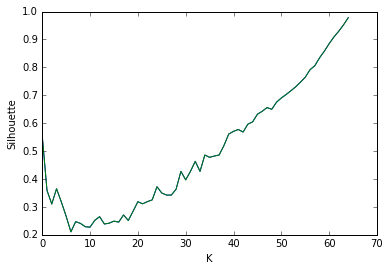

In [536]:
plt.plot(SI,label='All data')
plt.plot(SI,label='PCA (ncomponents=20) data')
plt.ylabel('Silhouette')
plt.xlabel('K')

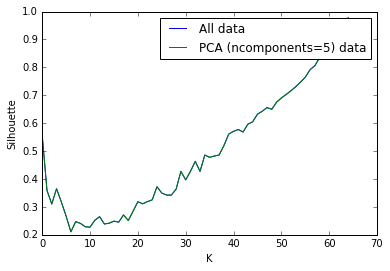

In [539]:
plt.plot(SI,label='All data')
plt.plot(SI,label='PCA (ncomponents=5) data')
plt.ylabel('Silhouette')
plt.xlabel('K')
plt.legend()

In [546]:
## CONCLUSIONS, either 2 clusters or > 35 clusters. We choose 2 clusters below

In [547]:
K=2

clf = cluster.KMeans(n_clusters=K, init='k-means++',  random_state=0, max_iter=300, n_init=10) 
                        #initialize the k-means clustering
clf.fit(all_A_reshaped) #run the k-means clustering

clf.labels_

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1], dtype=int32)

In [548]:
clf.labels_.shape

(67,)

In [551]:
all_A_reshaped.shape

(67, 64)

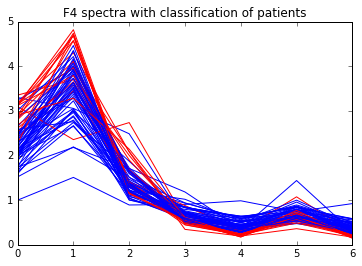

In [596]:
pacientes_A_F4 = all_A_df.ix['F4']
pacientes_A_F4 = pacientes_A_F4.drop('BandPowerRatio', axis=1)

for i in range(67):
        if clf.labels_[i]==0:
            plt.plot(pacientes_A_F4.values[:][i],color='red') 
        else:
            plt.plot(pacientes_A_F4.values[:][i],color='blue')
            
plt.title('F4 spectra with classification of patients')             
